#### **Pipeline Expectations & Data Quality Check**

Use expectations to apply quality constraints that validate data as it flows through ETL pipelines.

Based on Data Quality, Expectation allows to Keep/ Drop records or Fails the Flow

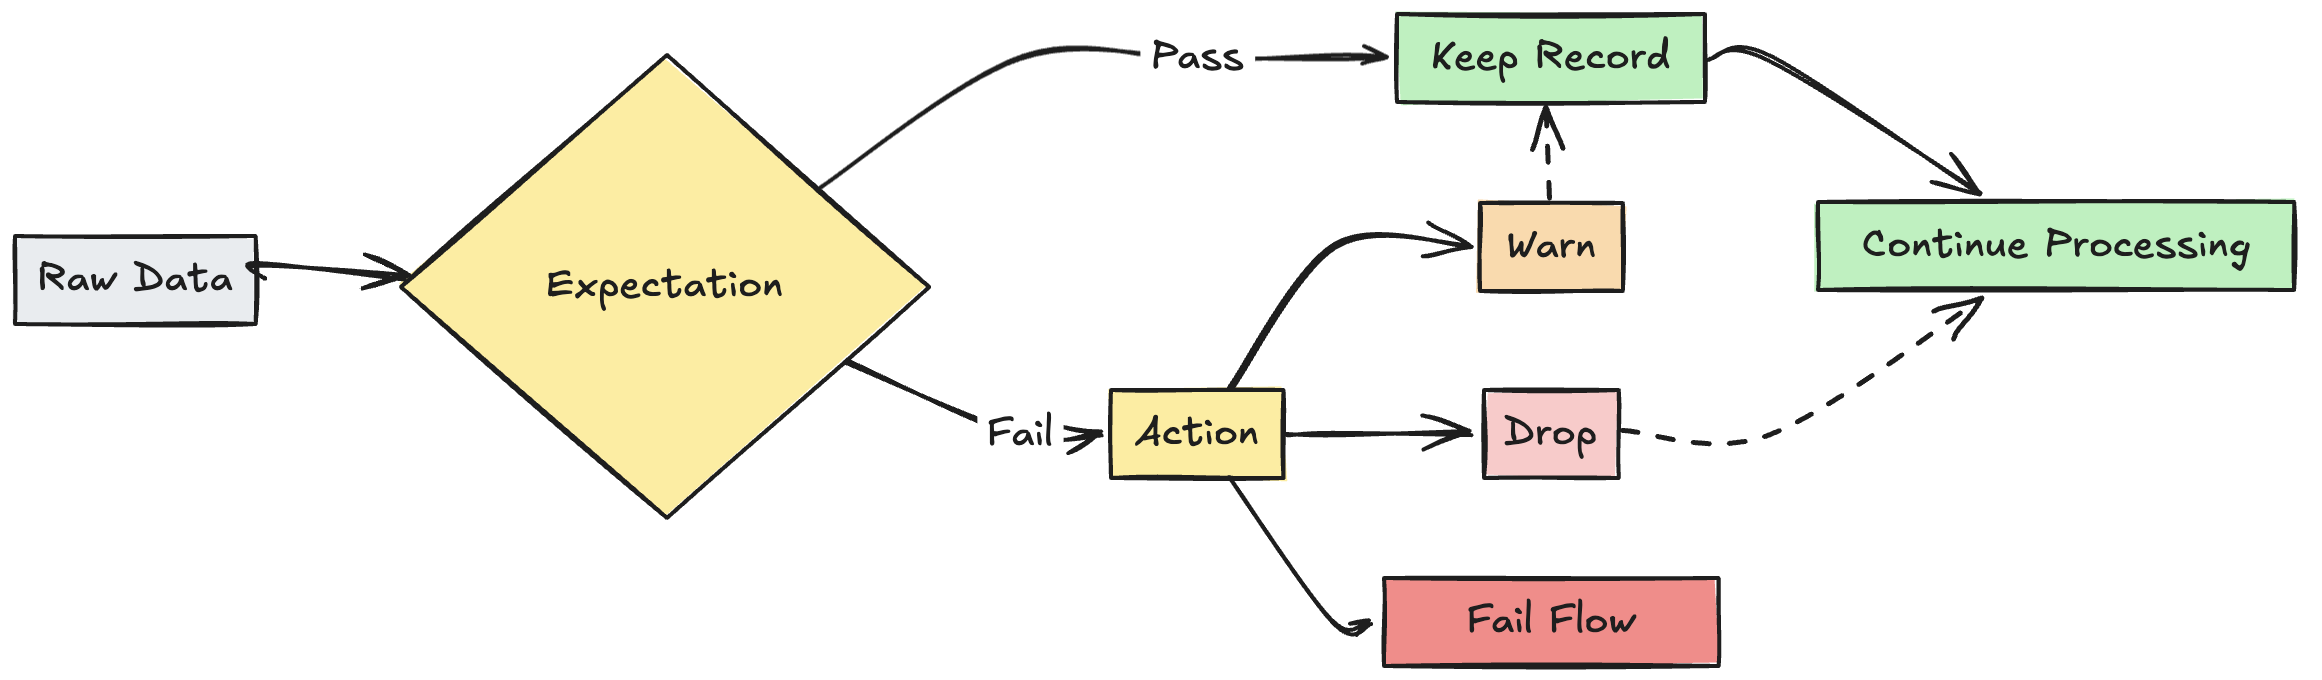

The following example defines the expectation `valid_customer_age` to confirm that age is between 0 and 120 years.
- `valid_customer_age` is name of Expectation which is used to track and monitor data quality / expectations.

- The **constraint clause is a SQL conditional statement** that must evaluate to true or false for each record

In [ ]:
@dlt.table
@dlt.expect("valid_customer_age", "age BETWEEN 0 AND 120")
def customers():
  return spark.readStream.table("datasets.samples.raw_customers")

##### Examples of constraints
The following are examples of constraints that could be added to dataset creation statements:

In [ ]:
# Simple constraint
@dlt.expect("non_negative_price", "price >= 0")

# SQL functions
@dlt.expect("valid_date", "year(transaction_date) >= 2020")

# CASE statements
@dlt.expect("valid_order_status", """
   CASE
     WHEN type = 'ORDER' THEN status IN ('PENDING', 'COMPLETED', 'CANCELLED')
     WHEN type = 'REFUND' THEN status IN ('PENDING', 'APPROVED', 'REJECTED')
     ELSE false
   END
""")

# Multiple constraints
@dlt.expect("non_negative_price", "price >= 0")
@dlt.expect("valid_purchase_date", "date <= current_date()")

# Complex business logic
@dlt.expect(
  "valid_subscription_dates",
  """start_date <= end_date
    AND end_date <= current_date()
    AND start_date >= '2020-01-01'"""
)

# Complex boolean logic
@dlt.expect("valid_order_state", """
   (status = 'ACTIVE' AND balance > 0)
   OR (status = 'PENDING' AND created_date > current_date() - INTERVAL 7 DAYS)
""")

##### **Action on invalid record**
An action to determine what happens when a record fails the validation check.

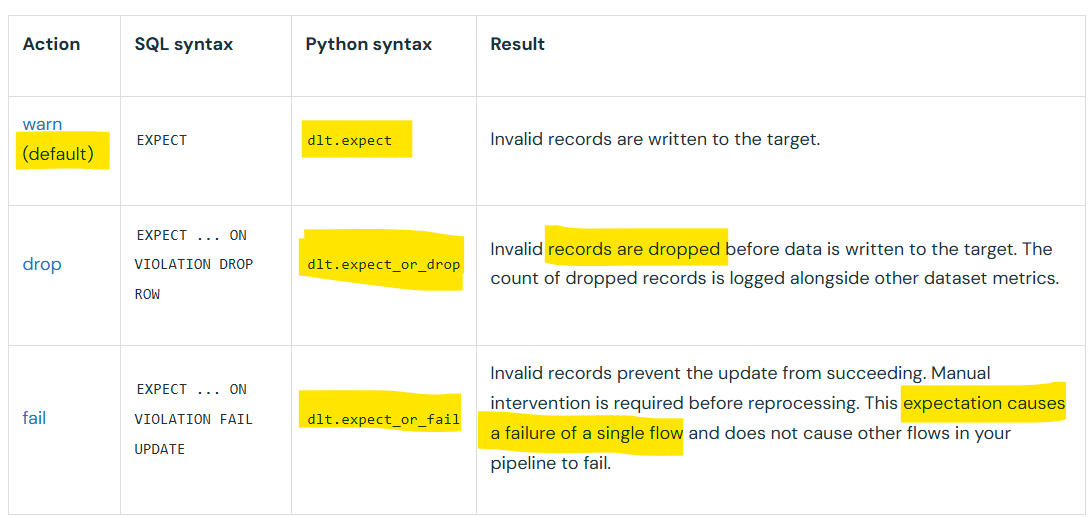

You can group multiple expectations together and specify collective actions using the functions `expect_all`, `expect_all_or_drop`, and `expect_all_or_fail`.

In [ ]:
# multiple expectations together
valid_pages = {
    "valid_count": "count > 0", 
    "valid_current_page": "current_page_id IS NOT NULL AND current_page_title IS NOT NULL"
    }

@dlt.table
@dlt.expect_all(valid_pages)
def raw_data():
  # Create a raw dataset

@dlt.table
@dlt.expect_all_or_drop(valid_pages)
def prepared_data():
  # Create a cleaned and prepared dataset

@dlt.table
@dlt.expect_all_or_fail(valid_pages)
def customer_facing_data():
  # Create cleaned and prepared to share the dataset

##### Limitations
- only streaming tables and materialized views support expectations
